<center><h1><b>Au & Ag</b></h1></center>

En esta JupyterNotebook voy a analizar los valores del Oro (Au) y Plata (Ag) y ver si hay una relación entre sus subidas y bajadas. Para obtener estos datos emplearé la librería *yfinance*.

In [1]:
import pandas as pd
import yfinance as yf

En primer lugar, hay que cargar los datos del Oro y guardarlos en un DataFrame que llamaré ``dfau``.

In [2]:
gold=yf.Ticker('GC=F')
dfau=gold.history(period='max')
dfau.reset_index(inplace=True)
dfau=dfau.iloc[:,0:6]
dfau.tail()

,Date,Open,High,Low,Close,Volume
6179,2025-04-17 00:00:00-04:00,3345.000000,3345.000000,3287.800049,3308.699951,824
6180,2025-04-21 00:00:00-04:00,3342.199951,3418.500000,3342.199951,3406.199951,78
6181,2025-04-22 00:00:00-04:00,3422.199951,3485.600098,3361.699951,3400.800049,785
6182,2025-04-23 00:00:00-04:00,3321.199951,3370.300049,3256.199951,3276.300049,785
6183,2025-04-24 00:00:00-04:00,3301.800049,3377.000000,3301.300049,3345.899902,122178


Análogamente, con la Plata usaré ``dfag``.

In [3]:
silver=yf.Ticker('SI=F')
dfag=silver.history(period='max')
dfag.reset_index(inplace=True)
dfag=dfag.iloc[:,0:6]
dfag.tail()

,Date,Open,High,Low,Close,Volume
6181,2025-04-17 00:00:00-04:00,32.334999,32.580002,32.090000,32.419998,168
6182,2025-04-21 00:00:00-04:00,32.650002,32.785000,32.495998,32.495998,56
6183,2025-04-22 00:00:00-04:00,32.880001,32.880001,32.880001,32.880001,1
6184,2025-04-23 00:00:00-04:00,33.549999,33.549999,33.518002,33.518002,1
6185,2025-04-24 00:00:00-04:00,33.564999,33.669998,33.264999,33.389999,16891


Veamos ahora las gráficas por separado.

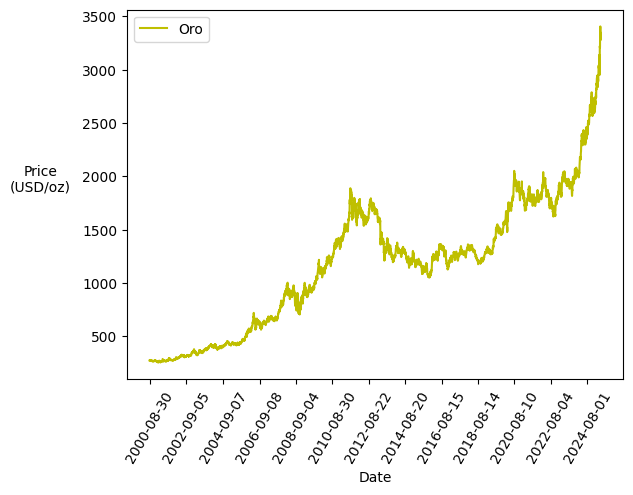

In [4]:
import matplotlib.pyplot as plt

plt.plot('Date','Close',data=dfau,color='y',label='Oro')
plt.xlabel('Date')
plt.ylabel('Price\n(USD/oz)',rotation=360,labelpad=30)
plt.xticks(dfau['Date'][::500],rotation=60)
plt.legend()
plt.show()

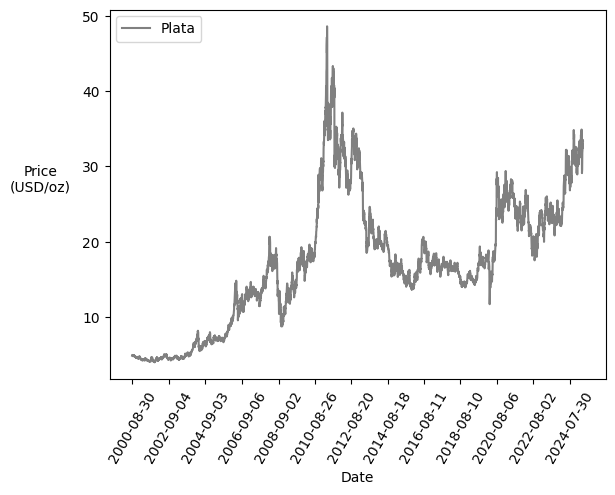

In [5]:
plt.plot('Date','Close',data=dfag,color='grey',label='Plata')
plt.xlabel('Date')
plt.ylabel('Price\n(USD/oz)',rotation=360,labelpad=30)
plt.xticks(dfag['Date'][::500],rotation=60)
plt.legend(loc='upper left')
plt.show()

A simple vista sí que parece que hay una dependencia entre ambos metales, no obstante, es complicado compararlos con precisión al estar en dos gráficas separadas. Vamos a juntarlas.

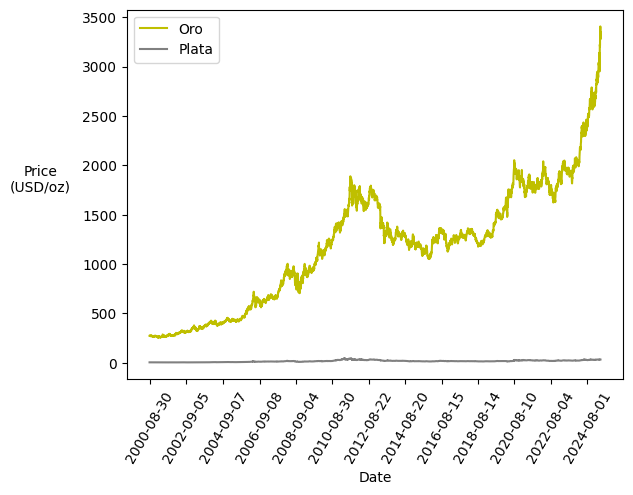

In [6]:
plt.plot('Date','Close',data=dfau,color='y',label='Oro')
plt.plot('Date','Close',data=dfag,color='grey',label='Plata')
plt.xlabel('Date')
plt.ylabel('Price\n(USD/oz)',rotation=360,labelpad=30)
plt.xticks(dfau['Date'][::500],rotation=60)
plt.legend()
plt.show()

En la gráfica superior se observa que, debido a que los valores de la Plata son mucho más pequeños que los del Oro, resulta imposible compararlos; para solucionarlo hay que "agrandar" la gráfica de la Plata. Calcularé la media de los cocientes de los valores del Oro entre los de la Plata, sin embargo, existe otro problema. Si empleo el código ``(dfau['Close']/dfag['Close']).mean()``, por un lado, me dará error ya que las tablas no tienen el mismo número de filas, y por otro, quiero que en la división estén los valores que se han registrado en el **mismo** día. Por tanto, hay que buscar y eliminar las filas cuyos días no están en ambas tablas, solucionando así ambos problemas.

In [7]:
j0=int(0)
k0=int(0)
for i,a in enumerate(dfau['Date']):
    for j in range(j0,len(dfag['Date'])):
        if a==dfag.loc[j,'Date']:
            k=j-i
            if k>k0:
                print(f'Todas las filas en el intervalo [{j0},{j-1}] de la columna "Date" del dataframe Plata no está en Oro.')
                k0=k
            j0=j+1
            break
        elif j==len(dfag['Date'])-1:
            print(f'La fila {i} de la columna "Date" del dataframe Oro no está en el de Plata.')
            k0=k0-1

Todas las filas en el intervalo [258,258] de la columna "Date" del dataframe Plata no está en Oro.
Todas las filas en el intervalo [1454,1454] de la columna "Date" del dataframe Plata no está en Oro.
La fila 1554 de la columna "Date" del dataframe Oro no está en el de Plata.
Todas las filas en el intervalo [1556,1556] de la columna "Date" del dataframe Plata no está en Oro.


In [8]:
dfau.drop(index=1554,inplace=True)
dfau.reset_index(drop=True,inplace=True)

dfag.drop(index=[258,1454,1556],inplace=True)
dfag.reset_index(drop=True,inplace=True)

Comprobemos que el ajuste anterior se ha realizado correctamente.

In [9]:
(dfau.loc[:,'Date']==dfag.loc[:,'Date']).value_counts()

Date
True    6183
Name: count, dtype: int64

Ahora estamos en condiciones de obtener el cociente deseado.

In [10]:
k=(dfau['Close']/dfag['Close']).mean()
k

68.78791942566043

Tomaré pues esta constante para "agrandar" la gráfica de la Plata y obtener así una visión más clara de ambas gráficas y mejores conclusiones.

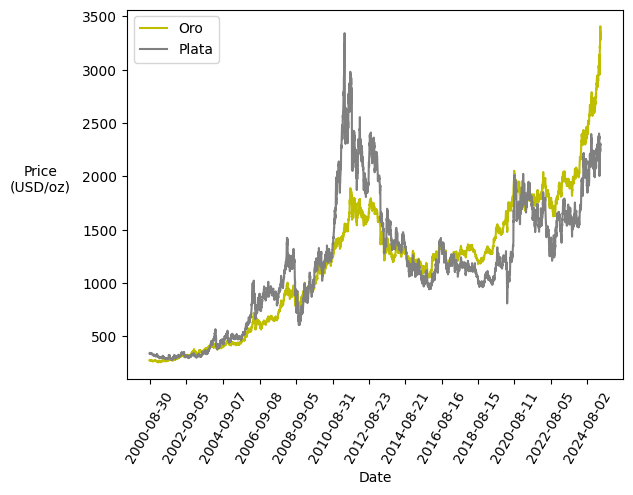

In [11]:
plt.plot('Date','Close',data=dfau,color='y',label='Oro')
plt.plot(dfag['Date'],k*dfag['Close'],color='grey',label='Plata')
plt.xlabel('Date')
plt.ylabel('Price\n(USD/oz)',rotation=360,labelpad=30)
plt.xticks(dfau['Date'][::500],rotation=60)
plt.legend()
plt.show()

Se observa claramente que las tendencias son similares, tanto al alza como a la baja. Además, se aprecia incluso que hay periodos, entre los años 2006-2008 y 2010-2013, en los que la Plata sube con algo más de velocidad. Falta ver cómo se comportará ante esta última gran subida del Oro; quizás haya que poner la atención sobre la Plata.

---
<h1> Author </h1>
CSSuanzes

24 de Abril de 2025
